In [2]:
from sympy import *
from sympy.geometry.point import *

In [3]:
init_printing()

In [76]:
De = Symbol('De')
p_be1 = Symbol('p_be,1')
p_be2 = Symbol('p_be,2')
p_bo1 = Symbol('p_bo,1')
p_bo2 = Symbol('p_bo,2')
p_bo3 = Symbol('p_bo,3')
p_bo4 = Symbol('p_bo,4')
p_bo5 = Symbol('p_bo,5')
p_bo6 = Symbol('p_bo,6')

r0 = Symbol('r_0')
r0pi = Symbol('r_0,\pi')
r0pipi = Symbol('r_0,\pi\pi')
p_over = Symbol('p_over')
p_under = Symbol('p_under')
eta = Symbol('\eta')
chi = Symbol('\chi')
gamma = Symbol('\gamma')
I = Symbol('I')

lambda1 = Symbol('\lambda_1')
lambda2 = Symbol('\lambda_2')
lambda3 = Symbol('\lambda_3')
lambda4 = Symbol('\lambda_4')
lambda5 = Symbol('\lambda_5')
lambda6 = Symbol('\lambda_6')
lambda7 = Symbol('\lambda_7')
lambda8 = Symbol('\lambda_8')
lambda9 = Symbol('\lambda_9')
lambda10 = Symbol('\lambda_10')
lambda11 = Symbol('\lambda_11')
lambda12 = Symbol('\lambda_12')
lambda13 = Symbol('\lambda_13')
lambda14 = Symbol('\lambda_14')
lambda15 = Symbol('\lambda_15')
lambda16 = Symbol('\lambda_16')
lambda17 = Symbol('\lambda_17')
lambda18 = Symbol('\lambda_18')
lambda19 = Symbol('\lambda_19')
lambda20 = Symbol('\lambda_20')
lambda21 = Symbol('\lambda_21')
lambda22 = Symbol('\lambda_22')
lambda23 = Symbol('\lambda_23')
lambda24 = Symbol('\lambda_24')
lambda25 = Symbol('\lambda_25')
lambda26 = Symbol('\lambda_26')
lambda27 = Symbol('\lambda_27')
lambda28 = Symbol('\lambda_28')

r_vdw = Symbol('r_vdW,ij')
eps = Symbol('\epsilon_ij')
alpha = Symbol('\\alpha_ij') # needs double \\ for some reason
gamma_w = Symbol('\gamma_w,ij')


nbond = Symbol('n_{bond}')

Val_i = Symbol('Val_i')
Val_j = Symbol('Val_j')

x_i = Symbol('x_i', real=True)
x_j = Symbol('x_j', real=True)
y_i = Symbol('y_i', real=True)
y_j = Symbol('y_j', real=True)
i = Matrix([x_i, y_i])
j = Matrix([x_j, y_j])

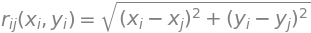

In [5]:
r = lambda i, j: (i - j).norm()
r_ij = Function(Symbol('r_ij'))
Eq(r_ij(x_i, y_i), r(i, j))

In [6]:
diff(r(i, j), i).simplify()

⎡           xᵢ - x_j           ⎤
⎢──────────────────────────────⎥
⎢   ___________________________⎥
⎢  ╱           2             2 ⎥
⎢╲╱  (xᵢ - x_j)  + (yᵢ - y_j)  ⎥
⎢                              ⎥
⎢           yᵢ - y_j           ⎥
⎢──────────────────────────────⎥
⎢   ___________________________⎥
⎢  ╱           2             2 ⎥
⎣╲╱  (xᵢ - x_j)  + (yᵢ - y_j)  ⎦

In [34]:
BOʼ = lambda r_ij: exp(p_bo1 * (r_ij/r0)**p_bo2) +\
                   exp(p_bo3 * (r_ij/r0pi)**p_bo4) +\
                   exp(p_bo5 * (r_ij/r0pipi)**p_bo6)
BOʼij = Function('BOʼ_ij')
Eq(BOʼij(x_i, y_i), BOʼ(r_ij(x_i, x_j)))

In [35]:
diff(BOʼ(r_ij(x_i, y_i)), i).simplify()

⎡⎛                                                         p_bo,2                                                            p_bo,4                                                            p_bo,6⎞                  ⎤
⎢⎜                                           ⎛r_ij(xᵢ, yᵢ)⎞                                                    ⎛r_ij(xᵢ, yᵢ)⎞                                                    ⎛r_ij(xᵢ, yᵢ)⎞      ⎟                  ⎥
⎢⎜                            p_bo,2  p_bo,1⋅⎜────────────⎟                                     p_bo,4  p_bo,3⋅⎜────────────⎟                                     p_bo,6  p_bo,5⋅⎜────────────⎟      ⎟                  ⎥
⎢⎜              ⎛r_ij(xᵢ, yᵢ)⎞               ⎝     r₀     ⎠                       ⎛r_ij(xᵢ, yᵢ)⎞               ⎝  r_0,\pi   ⎠                       ⎛r_ij(xᵢ, yᵢ)⎞               ⎝ r_0,\pi\pi ⎠      ⎟  ∂               ⎥
⎢⎜p_bo,1⋅p_bo,2⋅⎜────────────⎟      ⋅ℯ                            + p_bo,3⋅p_bo,4⋅⎜────────────⎟      ⋅ℯ                        

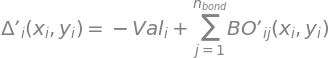

In [9]:
Deltaʼ = lambda BOʼij, Val_i: Sum(BOʼij, (Symbol('j'), 1, nbond)) - Val_i
Deltaʼi = Function('\Deltaʼ_i')
Deltaʼj = Function('\Deltaʼ_j')
Eq(Deltaʼi(x_i, y_i), Deltaʼ(BOʼij(x_i, y_i), Val_i))

In [46]:
# don't simplify, sympy doesn't know that BO'ij depends on j
diff(Deltaʼ(BOʼij(x_i, y_i), Val_i), i)

⎡n_{bond}                    ⎤
⎢  ____                      ⎥
⎢  ╲                         ⎥
⎢   ╲                        ⎥
⎢    ╲     ∂                 ⎥
⎢    ╱    ───(BOʼ_ij(xᵢ, yᵢ))⎥
⎢   ╱     ∂xᵢ                ⎥
⎢  ╱                         ⎥
⎢  ‾‾‾‾                      ⎥
⎢ j = 1                      ⎥
⎢                            ⎥
⎢n_{bond}                    ⎥
⎢  ____                      ⎥
⎢  ╲                         ⎥
⎢   ╲                        ⎥
⎢    ╲     ∂                 ⎥
⎢    ╱    ───(BOʼ_ij(xᵢ, yᵢ))⎥
⎢   ╱     ∂yᵢ                ⎥
⎢  ╱                         ⎥
⎢  ‾‾‾‾                      ⎥
⎣ j = 1                      ⎦

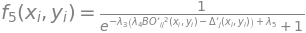

In [11]:
# crude approximation: if x < 1/3sqrt(a) then 0, else 1
f5 = lambda Deltaʼj, BOʼij: 1/(1 + exp(-lambda3 * (lambda4 * BOʼij**2 - Deltaʼj) + lambda5))
f5ij = Function('f_5')
Eq(f5ij(x_i, y_i), f5(Deltaʼj(x_i, y_i), BOʼij(x_i, y_i)))

In [12]:
diff(f5(BOʼij(x_i, y_i), Deltaʼj(x_i, y_i)), i).simplify()

⎡         ⎛                              ∂                        ∂                 ⎞⎤
⎢\lambda₃⋅⎜2⋅\lambda₄⋅\Deltaʼ_j(xᵢ, yᵢ)⋅───(\Deltaʼ_j(xᵢ, yᵢ)) - ───(BOʼ_ij(xᵢ, yᵢ))⎟⎥
⎢         ⎝                             ∂xᵢ                      ∂xᵢ                ⎠⎥
⎢────────────────────────────────────────────────────────────────────────────────────⎥
⎢           ⎛         ⎛                  2                         ⎞           ⎞     ⎥
⎢          2⎜\lambda₃⋅⎝\lambda₄⋅\Deltaʼ_j (xᵢ, yᵢ) - BOʼ_ij(xᵢ, yᵢ)⎠   \lambda₅⎟     ⎥
⎢    4⋅cosh ⎜─────────────────────────────────────────────────────── - ────────⎟     ⎥
⎢           ⎝                           2                                 2    ⎠     ⎥
⎢                                                                                    ⎥
⎢         ⎛                              ∂                        ∂                 ⎞⎥
⎢\lambda₃⋅⎜2⋅\lambda₄⋅\Deltaʼ_j(xᵢ, yᵢ)⋅───(\Deltaʼ_j(xᵢ, yᵢ)) - ───(BOʼ_ij(xᵢ, yᵢ))⎟⎥
⎢         ⎝                             ∂yᵢ

In [13]:
# f4 is really the same as f5 with Deltaʼi instead of Deltaʼj as argument
f4 = f5
f4ij = Function('f_4')

In [14]:
# decent approximation: if Deltaʼi < Deltaʼj then -x, else -Deltaʼj
f3 = lambda Deltaʼi, Deltaʼj: 1/lambda2 * ln(1/2 * (exp(-lambda2 * Deltaʼi) + exp(-lambda2 * Deltaʼj)))
f3ij = Function('f_3')
Eq(f3ij(x_i, y_i), f3(Deltaʼi(x_i, y_i), Deltaʼj(x_i, y_i)))

In [15]:
diff(f3(Deltaʼi(x_i, y_i), Deltaʼj(x_i, y_i)), i).simplify()

⎡ ⎛     \lambda₂⋅\Deltaʼᵢ(xᵢ, yᵢ)  ∂                            \lambda₂⋅\Deltaʼ_j(xᵢ, yᵢ)  ∂                   ⎞ ⎤
⎢-⎜1.0⋅ℯ                         ⋅───(\Deltaʼ_j(xᵢ, yᵢ)) + 1.0⋅ℯ                          ⋅───(\Deltaʼᵢ(xᵢ, yᵢ))⎟ ⎥
⎢ ⎝                               ∂xᵢ                                                      ∂xᵢ                  ⎠ ⎥
⎢─────────────────────────────────────────────────────────────────────────────────────────────────────────────────⎥
⎢                              \lambda₂⋅\Deltaʼᵢ(xᵢ, yᵢ)    \lambda₂⋅\Deltaʼ_j(xᵢ, yᵢ)                            ⎥
⎢                             ℯ                          + ℯ                                                      ⎥
⎢                                                                                                                 ⎥
⎢ ⎛     \lambda₂⋅\Deltaʼᵢ(xᵢ, yᵢ)  ∂                            \lambda₂⋅\Deltaʼ_j(xᵢ, yᵢ)  ∂                   ⎞ ⎥
⎢-⎜1.0⋅ℯ                         ⋅───(\Deltaʼ_j(xᵢ, yᵢ)) + 1.0⋅ℯ        

In [16]:
f2 = lambda Deltaʼi, Deltaʼj: exp(-lambda1 * Deltaʼi) + exp(-lambda1 * Deltaʼj)
f2ij = Function('f_2')
Eq(f2ij(x_i, y_i), f2(Deltaʼi(x_i, y_i), Deltaʼj(x_i, x_j)))

In [17]:
diff(f2(Deltaʼi(x_i, y_i), Deltaʼj(x_i, y_i)), i).simplify()

⎡            -\lambda₁⋅\Deltaʼ_j(xᵢ, yᵢ)  ∂                                 -\lambda₁⋅\Deltaʼᵢ(xᵢ, yᵢ)  ∂                   ⎤
⎢- \lambda₁⋅ℯ                           ⋅───(\Deltaʼ_j(xᵢ, yᵢ)) - \lambda₁⋅ℯ                          ⋅───(\Deltaʼᵢ(xᵢ, yᵢ))⎥
⎢                                        ∂xᵢ                                                           ∂xᵢ                  ⎥
⎢                                                                                                                           ⎥
⎢            -\lambda₁⋅\Deltaʼ_j(xᵢ, yᵢ)  ∂                                 -\lambda₁⋅\Deltaʼᵢ(xᵢ, yᵢ)  ∂                   ⎥
⎢- \lambda₁⋅ℯ                           ⋅───(\Deltaʼ_j(xᵢ, yᵢ)) - \lambda₁⋅ℯ                          ⋅───(\Deltaʼᵢ(xᵢ, yᵢ))⎥
⎣                                        ∂yᵢ                                                           ∂yᵢ                  ⎦

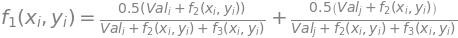

In [18]:
f1 = lambda Deltaʼi, Deltaʼj: 1/2 * \
  ((Val_i + f2ij(x_i, y_i))/(Val_i + f2ij(x_i, y_i) + f3ij(x_i, y_i)) +\
   (Val_j + f2ij(x_i, y_i))/(Val_j + f2ij(x_i, y_i) + f3ij(x_i, y_i)))
f1ij = Function('f_1')
Eq(f1ij(x_i, y_i), f1(Deltaʼi(x_i, y_i), Deltaʼj(x_i, x_j)))

In [19]:
diff(f1(Deltaʼi(x_i, y_i), Deltaʼj(x_i, y_i)), i).simplify()

⎡                 ∂                                   ∂                                       ∂                                    ∂                                    ∂                                   ∂              ⎤
⎢       0.5⋅Valᵢ⋅───(f₃(xᵢ, yᵢ))           0.5⋅Val_j⋅───(f₃(xᵢ, yᵢ))          0.5⋅f₂(xᵢ, yᵢ)⋅───(f₃(xᵢ, yᵢ))       0.5⋅f₃(xᵢ, yᵢ)⋅───(f₂(xᵢ, yᵢ))       0.5⋅f₂(xᵢ, yᵢ)⋅───(f₃(xᵢ, yᵢ))      0.5⋅f₃(xᵢ, yᵢ)⋅───(f₂(xᵢ, yᵢ)) ⎥
⎢                ∂xᵢ                                 ∂xᵢ                                     ∂xᵢ                                  ∂xᵢ                                  ∂xᵢ                                 ∂xᵢ             ⎥
⎢- ───────────────────────────────── - ────────────────────────────────── - ────────────────────────────────── + ────────────────────────────────── - ───────────────────────────────── + ─────────────────────────────────⎥
⎢                                  2                                    2                                    2      

In [20]:
# New paper actually multiplies with f1 twice for pi and pipi (but not for sigma)
BO = BOʼij(x_i, y_i) * f1ij(x_i, y_i) * f4ij(x_i, y_i) * f5ij(x_i, y_i)
BOij = Function('BO')
Eq(BOij(x_i, y_i), BO)

In [21]:
diff(BO, i)

⎡                                      ∂                                                      ∂                                                      ∂                                                  ∂                 ⎤
⎢BOʼ_ij(xᵢ, yᵢ)⋅f₁(xᵢ, yᵢ)⋅f₄(xᵢ, yᵢ)⋅───(f₅(xᵢ, yᵢ)) + BOʼ_ij(xᵢ, yᵢ)⋅f₁(xᵢ, yᵢ)⋅f₅(xᵢ, yᵢ)⋅───(f₄(xᵢ, yᵢ)) + BOʼ_ij(xᵢ, yᵢ)⋅f₄(xᵢ, yᵢ)⋅f₅(xᵢ, yᵢ)⋅───(f₁(xᵢ, yᵢ)) + f₁(xᵢ, yᵢ)⋅f₄(xᵢ, yᵢ)⋅f₅(xᵢ, yᵢ)⋅───(BOʼ_ij(xᵢ, yᵢ))⎥
⎢                                     ∂xᵢ                                                    ∂xᵢ                                                    ∂xᵢ                                                ∂xᵢ                ⎥
⎢                                                                                                                                                                                                                         ⎥
⎢                                      ∂                                                      ∂                         

In [22]:
# very good approximation:
Ebond = lambda BOij: -De * BOij
Ebondij = Function('E_bond')
Eq(Ebondij(x_i, y_i), Ebond(BOij(x_i, y_i)))

In [47]:
diff(Ebond(BOij(x_i, y_i)), i).simplify()

⎡     ∂             ⎤
⎢-De⋅───(BO(xᵢ, yᵢ))⎥
⎢    ∂xᵢ            ⎥
⎢                   ⎥
⎢     ∂             ⎥
⎢-De⋅───(BO(xᵢ, yᵢ))⎥
⎣    ∂yᵢ            ⎦

In [54]:
# let's do van der waals
# paper says this also uses lambda29 but that appears to be a typo
f13 = lambda rij: (rij**lambda28 + (1/gamma_w)**lambda28) ** (1 / lambda28)
f13ij = Function('f_13')
Eq(f13ij(x_i, y_i), f13(r_ij(x_i, y_i)))

In [68]:
diff(f13(r_ij(x_i, y_i)), i).simplify()

⎡                                                1 - \lambda₂₈                                            ⎤
⎢                                                ─────────────                                            ⎥
⎢                                                  \lambda₂₈                                              ⎥
⎢⎛             \lambda₂₈                        ⎞                                                         ⎥
⎢⎜⎛     1     ⎞                \lambda₂₈        ⎟                  \lambda₂₈ - 1          ∂               ⎥
⎢⎜⎜───────────⎟          + r_ij         (xᵢ, yᵢ)⎟             ⋅r_ij             (xᵢ, yᵢ)⋅───(r_ij(xᵢ, yᵢ))⎥
⎢⎝⎝\gamma_w,ij⎠                                 ⎠                                        ∂xᵢ              ⎥
⎢                                                                                                         ⎥
⎢                                                1 - \lambda₂₈                                            ⎥
⎢                           

In [78]:
f14 = lambda m, frij: exp(m * alpha * (1 - frij / r_vdw))
f14ij = Function('f_14')
f14aij = Function('f_{14}(1)')
f14bij = Function('f_{14}(0.5)')
Eq(f14ij(x_i, y_i), f14(Symbol('m'), f13ij(x_i, y_i)))

In [71]:
diff(f14(Symbol('m'), f13ij(x_i, y_i)), i)

⎡                          ⎛    f₁₃(xᵢ, yᵢ)⎞                  ⎤
⎢              \alpha_ij⋅m⋅⎜1 - ───────────⎟                  ⎥
⎢                          ⎝      r_vdW,ij ⎠  ∂               ⎥
⎢-\alpha_ij⋅m⋅ℯ                             ⋅───(f₁₃(xᵢ, yᵢ)) ⎥
⎢                                            ∂xᵢ              ⎥
⎢─────────────────────────────────────────────────────────────⎥
⎢                           r_vdW,ij                          ⎥
⎢                                                             ⎥
⎢                          ⎛    f₁₃(xᵢ, yᵢ)⎞                  ⎥
⎢              \alpha_ij⋅m⋅⎜1 - ───────────⎟                  ⎥
⎢                          ⎝      r_vdW,ij ⎠  ∂               ⎥
⎢-\alpha_ij⋅m⋅ℯ                             ⋅───(f₁₃(xᵢ, yᵢ)) ⎥
⎢                                            ∂yᵢ              ⎥
⎢─────────────────────────────────────────────────────────────⎥
⎣                           r_vdW,ij                          ⎦

In [82]:
Evdw = lambda f14aij, f14bij: eps * f14aij - 2 * f14bij
Evdwij = Function('E_vdW')
Eq(Evdwij(x_i, y_i), Evdw(f14aij(x_i, y_i), f14bij(x_i, y_i)))

In [83]:
diff(Evdw(f14aij(x_i, y_i), f14bij(x_i, y_i)), i)

⎡             ∂                          ∂                      ⎤
⎢\epsilon_ij⋅───(f_{14}(1)(xᵢ, yᵢ)) - 2⋅───(f_{14}(0.5)(xᵢ, yᵢ))⎥
⎢            ∂xᵢ                        ∂xᵢ                     ⎥
⎢                                                               ⎥
⎢             ∂                          ∂                      ⎥
⎢\epsilon_ij⋅───(f_{14}(1)(xᵢ, yᵢ)) - 2⋅───(f_{14}(0.5)(xᵢ, yᵢ))⎥
⎣            ∂yᵢ                        ∂yᵢ                     ⎦